In [1]:
import pandas as pd
from matplotlib import pyplot
import statistics
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
Data = pd.read_csv('train_LZdllcl.csv')

Test = pd.read_csv('test_2umaH9m.csv')
Test = Test.drop(['employee_id'],axis=1)


Data1=Data

target = Data['is_promoted']

Data = Data.drop(['is_promoted'],axis=1)
Data = Data.drop(['employee_id'],axis=1)


In [3]:
target

0        0
1        0
2        0
3        0
4        0
        ..
54803    0
54804    0
54805    0
54806    0
54807    0
Name: is_promoted, Length: 54808, dtype: int64

In [4]:
Data.info()
Data.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   department            54808 non-null  object 
 1   region                54808 non-null  object 
 2   education             52399 non-null  object 
 3   gender                54808 non-null  object 
 4   recruitment_channel   54808 non-null  object 
 5   no_of_trainings       54808 non-null  int64  
 6   age                   54808 non-null  int64  
 7   previous_year_rating  50684 non-null  float64
 8   length_of_service     54808 non-null  int64  
 9   KPIs_met >80%         54808 non-null  int64  
 10  awards_won?           54808 non-null  int64  
 11  avg_training_score    54808 non-null  int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 5.0+ MB


(54808, 12)

In [5]:
Test.info()
Test.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23490 entries, 0 to 23489
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   department            23490 non-null  object 
 1   region                23490 non-null  object 
 2   education             22456 non-null  object 
 3   gender                23490 non-null  object 
 4   recruitment_channel   23490 non-null  object 
 5   no_of_trainings       23490 non-null  int64  
 6   age                   23490 non-null  int64  
 7   previous_year_rating  21678 non-null  float64
 8   length_of_service     23490 non-null  int64  
 9   KPIs_met >80%         23490 non-null  int64  
 10  awards_won?           23490 non-null  int64  
 11  avg_training_score    23490 non-null  int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 2.2+ MB


(23490, 12)

In [6]:
#number of unique values in Data 
Data.apply(pd.Series.nunique)

department               9
region                  34
education                3
gender                   2
recruitment_channel      3
no_of_trainings         10
age                     41
previous_year_rating     5
length_of_service       35
KPIs_met >80%            2
awards_won?              2
avg_training_score      61
dtype: int64

In [7]:
Test.apply(pd.Series.nunique)

department               9
region                  34
education                3
gender                   2
recruitment_channel      3
no_of_trainings          9
age                     41
previous_year_rating     5
length_of_service       34
KPIs_met >80%            2
awards_won?              2
avg_training_score      61
dtype: int64

In [8]:
##lot of dataFeatures are given, segregating as per the type

quantitative_data = [i for i in Test if Test[i].dtype == np.int64]

print("A total of {} quantitative columns are in data".format(len(quantitative_data)))
print('\n',quantitative_data,'\n')

qualitative_data = [i for i in Test if Test[i].dtype == np.object]

print("A total of {} object columns are in data".format(len(qualitative_data)))

print('\n',qualitative_data,'\n')

continuous_data = [i for i in Test if Test[i].dtype == np.float64]

print("A total of {} continuous columns are in data".format(len(continuous_data)))

print('\n',continuous_data,'\n')



A total of 6 quantitative columns are in data

 ['no_of_trainings', 'age', 'length_of_service', 'KPIs_met >80%', 'awards_won?', 'avg_training_score'] 

A total of 5 object columns are in data

 ['department', 'region', 'education', 'gender', 'recruitment_channel'] 

A total of 1 continuous columns are in data

 ['previous_year_rating'] 



In [9]:
##lot of dataFeatures are given, segregating as per the type

quantitative_data = [i for i in Data if Data[i].dtype == np.int64]

print("A total of {} quantitative columns are in data".format(len(quantitative_data)))
print('\n',quantitative_data,'\n')

qualitative_data = [i for i in Data if Data[i].dtype == np.object]

print("A total of {} object columns are in data".format(len(qualitative_data)))

print('\n',qualitative_data,'\n')

continuous_data = [i for i in Data if Data[i].dtype == np.float64]

print("A total of {} continuous columns are in data".format(len(continuous_data)))

print('\n',continuous_data,'\n')



A total of 6 quantitative columns are in data

 ['no_of_trainings', 'age', 'length_of_service', 'KPIs_met >80%', 'awards_won?', 'avg_training_score'] 

A total of 5 object columns are in data

 ['department', 'region', 'education', 'gender', 'recruitment_channel'] 

A total of 1 continuous columns are in data

 ['previous_year_rating'] 



<Figure size 1152x648 with 0 Axes>

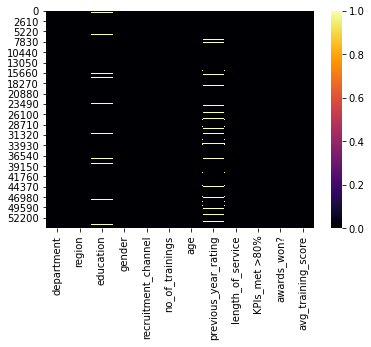

<Figure size 1152x648 with 0 Axes>

In [10]:
#NullValues with the help of Heatmap
sns.heatmap(Data.isnull(), cmap="inferno")
plt.figure(figsize=(16,9))


<Figure size 1152x648 with 0 Axes>

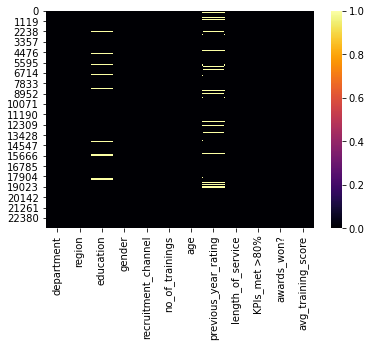

<Figure size 1152x648 with 0 Axes>

In [11]:
#NullValues with the help of Heatmap
sns.heatmap(Test.isnull(), cmap="inferno")
plt.figure(figsize=(16,9))


In [12]:
null = Data.isnull().sum().sort_values(ascending=False)
#First sum and order all null values for each variable
percent = (Data.isnull().sum()/Data.isnull().count()).sort_values(ascending=False) 
dataType = Data.dtypes
missing_variables = pd.concat([null, percent,dataType], axis=1, keys=['Total', 'percent','Data Type'])
missing_variables = missing_variables.head(19)

In [13]:
missing_variables

,Total,percent,Data Type
previous_year_rating,4124,0.075244,float64
education,2409,0.043953,object
avg_training_score,0,0.000000,int64
awards_won?,0,0.000000,int64
KPIs_met >80%,0,0.000000,int64
length_of_service,0,0.000000,int64
age,0,0.000000,int64
no_of_trainings,0,0.000000,int64
recruitment_channel,0,0.000000,object
gender,0,0.000000,object


In [14]:
null = Test.isnull().sum().sort_values(ascending=False)
#First sum and order all null values for each variable
percent = (Test.isnull().sum()/Test.isnull().count()).sort_values(ascending=False) 
dataType = Test.dtypes
missing_variables = pd.concat([null, percent,dataType], axis=1, keys=['Total', 'percent','Data Type'])
missing_variables_test = missing_variables.head(19)

In [15]:
missing_variables_test

,Total,percent,Data Type
previous_year_rating,1812,0.077139,float64
education,1034,0.044019,object
avg_training_score,0,0.000000,int64
awards_won?,0,0.000000,int64
KPIs_met >80%,0,0.000000,int64
length_of_service,0,0.000000,int64
age,0,0.000000,int64
no_of_trainings,0,0.000000,int64
recruitment_channel,0,0.000000,object
gender,0,0.000000,object


In [16]:
#putting them in the frameowrk on features to do encoding after imputing , finind var and passing float and integer for imputing - Test DATA

Categorical_Test = Test.select_dtypes(include='object') 
IntegerData_Test = Test.select_dtypes(include='int64') 
FloatData_Test = Test.select_dtypes(include='float64') 

In [17]:
#putting them in the frameowrk on features to do encoding after imputing , finind var and passing float and integer for imputing - TRAIN DATA

Categorical = Data.select_dtypes(include='object') 
IntegerData = Data.select_dtypes(include='int64') 
FloatData = Data.select_dtypes(include='float64') 

In [18]:
#using the concept of VIF to check for redundant var
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif


In [19]:
VIF = pd.DataFrame()
IntegerData['Intercept'] = 1
VIF['Independent Variables'] = IntegerData.columns
VIF['VIF'] = [vif(IntegerData.values, i) for i in range(IntegerData.shape[1])]
VIF = VIF.set_index('Independent Variables').drop(index = 'Intercept').T

In [20]:
#no such Feature that has multi col
VIF

Independent Variables,no_of_trainings,age,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
VIF,1.010924,1.770211,1.774248,1.023852,1.015329,1.014497


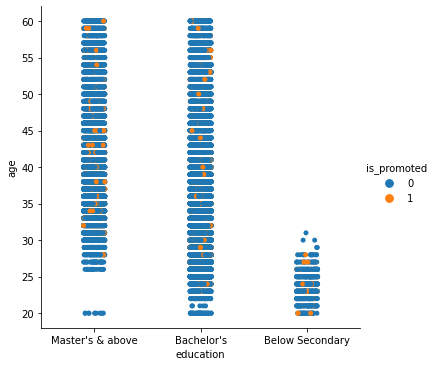

In [21]:
sns.catplot(x="education", y="age" , hue="is_promoted",data=Data1)


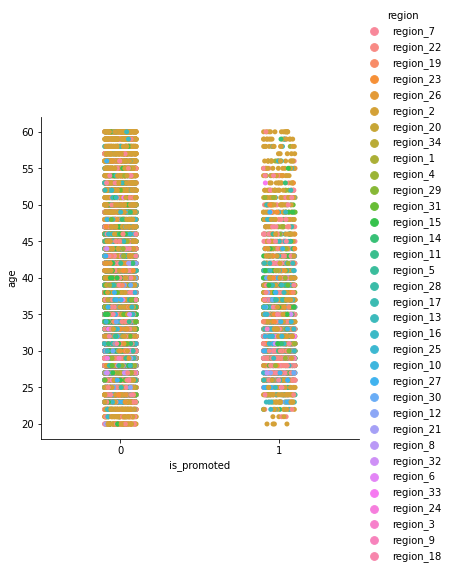

In [22]:
sns.catplot(x="is_promoted", y="age", hue="region", data=Data1)
figsize=(15,30)

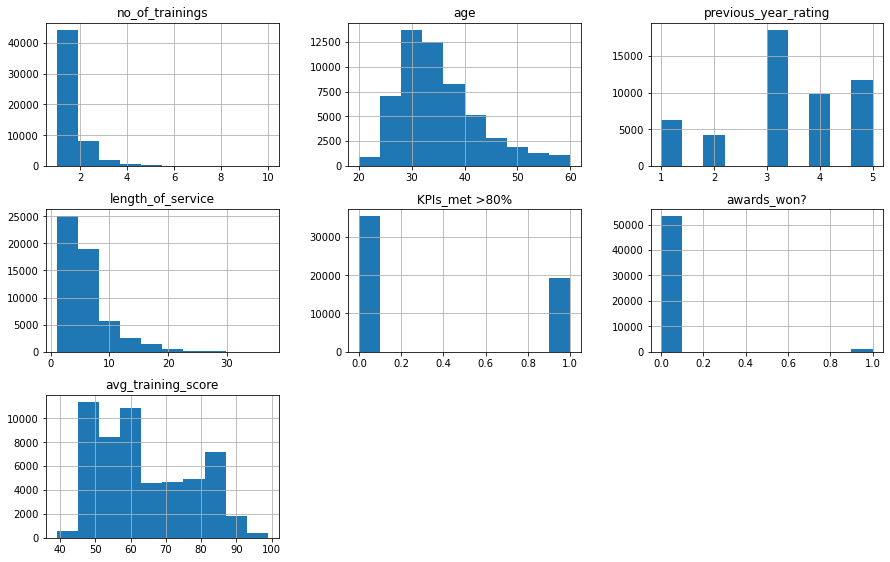

In [23]:
Data.hist(figsize=(15,30),layout=(9,3))
plt.show()


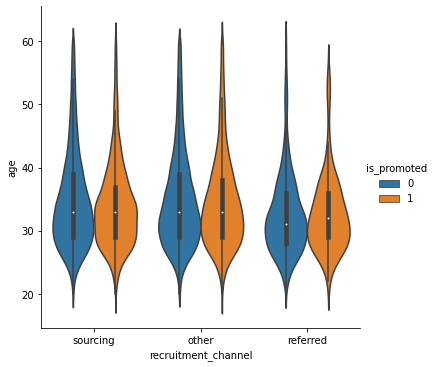

In [24]:
sns.catplot(x="recruitment_channel", y="age", hue="is_promoted",
            kind="violin", data=Data1)

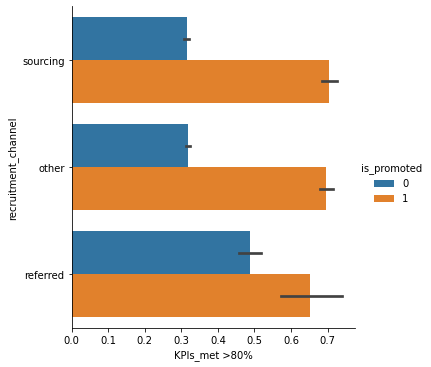

In [25]:
#sourcing and refferal have good chance of conversion into promotion 

sns.catplot(x="KPIs_met >80%", y="recruitment_channel", hue="is_promoted",
            kind="bar", data=Data1)

<AxesSubplot:xlabel='avg_training_score', ylabel='length_of_service'>

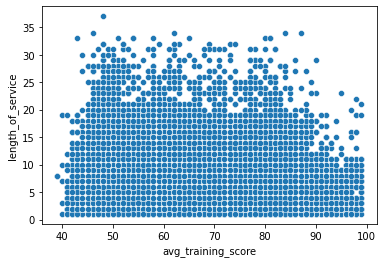

In [26]:
#standard performance acorss all age groups 

sns.scatterplot(Data['avg_training_score'],Data['length_of_service'])


In [27]:
Categorical['region'].value_counts()

region_2     12343
region_22     6428
region_7      4843
region_15     2808
region_13     2648
region_26     2260
region_31     1935
region_4      1703
region_27     1659
region_16     1465
region_28     1318
region_11     1315
region_23     1175
region_29      994
region_32      945
region_19      874
region_20      850
region_14      827
region_25      819
region_17      796
region_5       766
region_6       690
region_30      657
region_8       655
region_10      648
region_1       610
region_24      508
region_12      500
region_9       420
region_21      411
region_3       346
region_34      292
region_33      269
region_18       31
Name: region, dtype: int64

In [28]:
#imputing the Null values with mode

print(Categorical['education'].value_counts())
print('******************************************')
print(Categorical['education'].value_counts())

Bachelor's          36669
Master's & above    14925
Below Secondary       805
Name: education, dtype: int64
******************************************
Bachelor's          36669
Master's & above    14925
Below Secondary       805
Name: education, dtype: int64


In [29]:
from sklearn.impute import SimpleImputer

imp = SimpleImputer(missing_values=np.nan,strategy='most_frequent')

Categorical_Test['education'] = imp.fit_transform(Categorical_Test[['education']]).ravel()
Categorical_Test['education']=pd.DataFrame(Categorical_Test['education'])

<AxesSubplot:xlabel='previous_year_rating'>

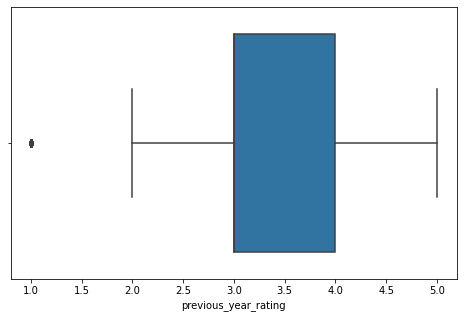

In [30]:
plt.figure(figsize=(8,5))
sns.boxplot('previous_year_rating',data=Data1)

In [31]:

imp = SimpleImputer(missing_values=np.nan,strategy='most_frequent')

Categorical['education'] = imp.fit_transform(Categorical[['education']]).ravel()
Categorical['education']=pd.DataFrame(Categorical['education'])

In [32]:
#Ealier we have listed all the datatypes that are there, now we select only the features with datatype Object in LabelEn and do Label encoding - TRAIN CASE

from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
Categorical_Test = Categorical_Test.apply(label_encoder.fit_transform)

In [33]:
#Ealier we have listed all the datatypes that are there, now we select only the features with datatype Object in LabelEn and do Label encoding - TRAIN CASE

from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
Categorical = Categorical.apply(label_encoder.fit_transform)

In [34]:
#imputing for the train case dataset 

from sklearn.impute import SimpleImputer

imp = SimpleImputer(missing_values=np.nan,strategy='mean')

FloatData_Test= imp.fit_transform(FloatData_Test)
FloatData_Test=pd.DataFrame(FloatData_Test)
FloatData_Test=FloatData_Test.rename(columns = {0:'previous year rating'}, inplace = False)


In [35]:
#imputing for the train case dataset 

from sklearn.impute import SimpleImputer

imp = SimpleImputer(missing_values=np.nan,strategy='mean')

FloatData= imp.fit_transform(FloatData)
FloatData=pd.DataFrame(FloatData)
FloatData=FloatData.rename(columns = {0:'previous year rating'}, inplace = False)


In [36]:
#a zero variance column will always have exactly one distinct value in the Interger only var

temp = []
for i in IntegerData_Test.columns:
    if IntegerData_Test[i].var()==0:
        temp.append(i)
print(len(temp))
print(temp)

0
[]


In [37]:
#a zero variance column will always have exactly one distinct value in the Interger only var

temp = []
for i in IntegerData.columns:
    if IntegerData[i].var()==0:
        temp.append(i)
print(len(temp))
print(temp)

1
['Intercept']


In [38]:
features = pd.concat([FloatData,Categorical,IntegerData],axis=1)


In [39]:
features_Test = pd.concat([FloatData_Test,Categorical_Test,IntegerData_Test],axis=1)


In [40]:
print("Lets look at Ratio of majority to minority")
Data1['is_promoted'].value_counts()

m = np.ones_like(Data1.drop(columns = 'is_promoted').corr())
m[np.tril_indices_from(m)]=0

Lets look at Ratio of majority to minority


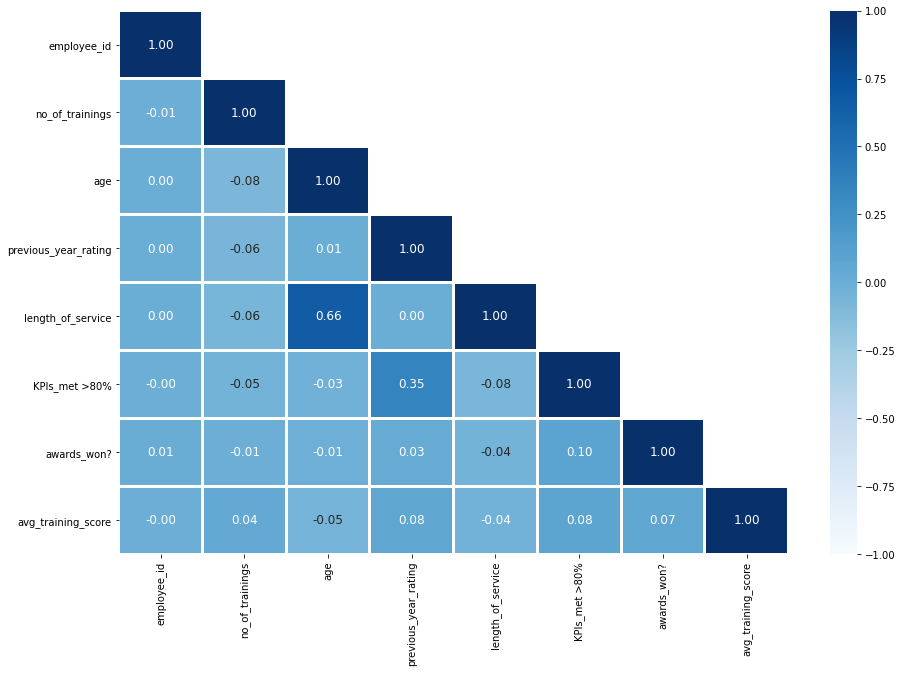

In [41]:
#we saw that we had no multi col, lets take a prespective via plotting

plt.figure(figsize = (15,10))
sns.heatmap(Data1.drop(columns = 'is_promoted').corr(), annot= True, annot_kws= {'size' : 12},
           cmap = 'Blues', fmt = '.2f', linewidths= 2, linecolor='white', mask = m,vmin=-1)
plt.show();

In [42]:
target.shape,features.shape

((54808,), (54808, 13))

In [43]:
print("Before Sampling")

target.value_counts()

Before Sampling


0    50140
1     4668
Name: is_promoted, dtype: int64

In [44]:
from imblearn.over_sampling import SMOTE


features, target = SMOTE().fit_resample(features, target)

In [45]:
print("After Sampling")

target.value_counts()

After Sampling


1    50140
0    50140
Name: is_promoted, dtype: int64

In [46]:
#standardizing the data

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
features = sc.fit_transform(features)
features_Test = sc.fit_transform(features_Test)
features_Test = pd.DataFrame(features_Test)


In [47]:
from sklearn import model_selection
from sklearn.model_selection import KFold

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn import metrics


In [48]:
models = []
models.append(('LogisticRegression', LogisticRegression()))
models.append(('DecisionTreeClassifier', DecisionTreeClassifier()))
models.append(('RandomForestClassifier', RandomForestClassifier()))
models.append(('AdaBoostClassifier', AdaBoostClassifier()))
models.append(('GaussianNB', GaussianNB()))
names = []
results = []

In [49]:
#The 10-fold cross validation procedure is used to evaluate each algorithm,same random seed to ensure that the same splits happen
scoring = 'accuracy'
for name, model in models:
    kfold = model_selection.KFold(n_splits=10,shuffle=True, random_state=123)
    cv_results = model_selection.cross_val_score(model, features, target, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)


LogisticRegression: 0.714878 (0.003213)
DecisionTreeClassifier: 0.930185 (0.003630)
RandomForestClassifier: 0.955674 (0.002450)
AdaBoostClassifier: 0.819884 (0.004484)
GaussianNB: 0.715038 (0.004842)


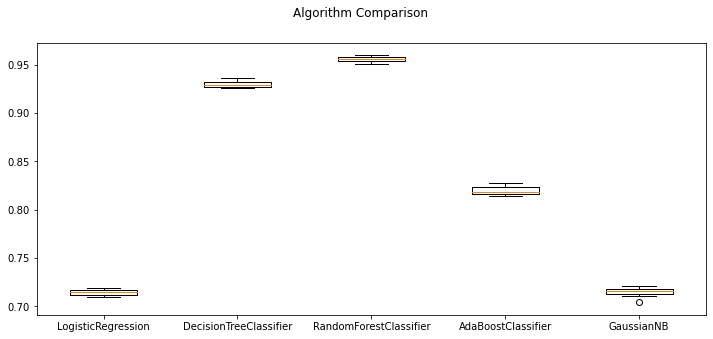

In [50]:
# boxplot algorithm comparison
fig = plt.figure(figsize=(12,5))
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot()
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

Among all the models the RandomForestClassifier seems the best 

In [51]:
model = LogisticRegression()

model.fit(features, target)

y_pred_test = model.predict(features_Test)

y_pred_test  = y_pred_test.astype(int)


ValueError: X has 12 features per sample; expecting 13

In [ ]:
submission=pd.DataFrame()

sample_submission = pd.read_csv('sample_submission_M0L0uXE.csv')



submission['employee_id']= sample_submission.employee_id

submission['is_promoted']=y_pred_test

In [ ]:
submission

In [ ]:
submission.to_csv('HR_promotion.csv',index=False)